# **DATA CLEANING**

***Data cleaning*** is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

**GIGO**: if data are incorrect, outcomes and algorithms are often unreliable. There is no one absolute way to establish the exact steps in the data cleaning process, it depends on the context.

Tasks:
1. Normalization/Standardization
2. Error Detection and Correction (*e.g.,* inconsistencies, missing data, outliers)
3. Duplicate Detection (and Data Fusion)

# **5. MISSING VALUES IMPUTATION**

***Data Imputation*** is the process of replacing missing data with substituted values. Missing values can introduce bias, can make some analyses difficult to be performed (even some algorithms do not support them) and decrease efficiency.

Data Imputation Methods:

*   SINGLE IMPUTATION
*   ML-BASED IMPUTATION
*   MULTIPLE IMPUTATION

Import libraries:

In [1]:
!git clone https://github.com/camillasancricca/DATADIQ.git

Cloning into 'DATADIQ'...
remote: Enumerating objects: 238, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 238 (delta 44), reused 1 (delta 1), pack-reused 139 (from 1)
Receiving objects: 100% (238/238), 11.34 MiB | 3.62 MiB/s, done.
Resolving deltas: 100% (100/100), done.


In [2]:
import pandas as pd
import numpy as np
import missingno as mno

from sklearn import linear_model
from sklearn import ensemble
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

from DATADIQ import scripts_for_E5 as s

Import data:

In [4]:
BEERS = pd.read_csv("https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/BEERS.csv")
BEERS

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,66.000,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,71.000,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,75.000,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2414,67.000,45.0,928,Belgorado,Belgian IPA,424,12.0
2415,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2416,55.000,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2417,55.000,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


**1. SINGLE IMPUTATION**

  - Replace with *standard values*
  - *Propagate* the last/next valid observation
  - *Replace* with the mean, median, standard deviation, most frequent value

In [5]:
BEERS.isnull().sum()

,0
abv,62
ibu,1007
id,0
name,0
style,5
brewery_id,0
ounces,0


In [ ]:
BEERS['ibu'].fillna(0)

In [7]:
BEERS['style'].fillna('Unknown')

,style
0,American Pale Lager
1,American Pale Ale (APA)
2,American IPA
3,American Double / Imperial IPA
4,American IPA
...,...
2414,Belgian IPA
2415,American Amber / Red Ale
2416,Schwarzbier
2417,American Pale Ale (APA)


In [6]:
BEERS['ibu'].fillna(method='ffill') #useful in temporal order

,ibu
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2414,45.0
2415,45.0
2416,45.0
2417,40.0


In [ ]:
BEERS['ibu'].fillna(BEERS.ibu.mean())

In [10]:
BEERS['ibu'].fillna(BEERS.ibu.median()) #better to use median to take in account extremes

,ibu
0,35.0
1,35.0
2,35.0
3,35.0
4,35.0
...,...
2414,45.0
2415,35.0
2416,35.0
2417,40.0


In [15]:
BEERS['style'].fillna(BEERS['style'].mode().values[0]) #in categorical is better the mode

,style
0,American Pale Lager
1,American Pale Ale (APA)
2,American IPA
3,American Double / Imperial IPA
4,American IPA
...,...
2414,Belgian IPA
2415,American Amber / Red Ale
2416,Schwarzbier
2417,American Pale Ale (APA)


In [16]:
DIAB = pd.read_csv("https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/DIABETES.csv")
DIAB

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
COLS = list(DIAB.columns)
COLS.remove("Outcome")

In [18]:
DIAB[COLS] = DIAB[COLS].replace(0,np.nan)
DIAB

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


*missingno* library: visualize missing cells

<Axes: >

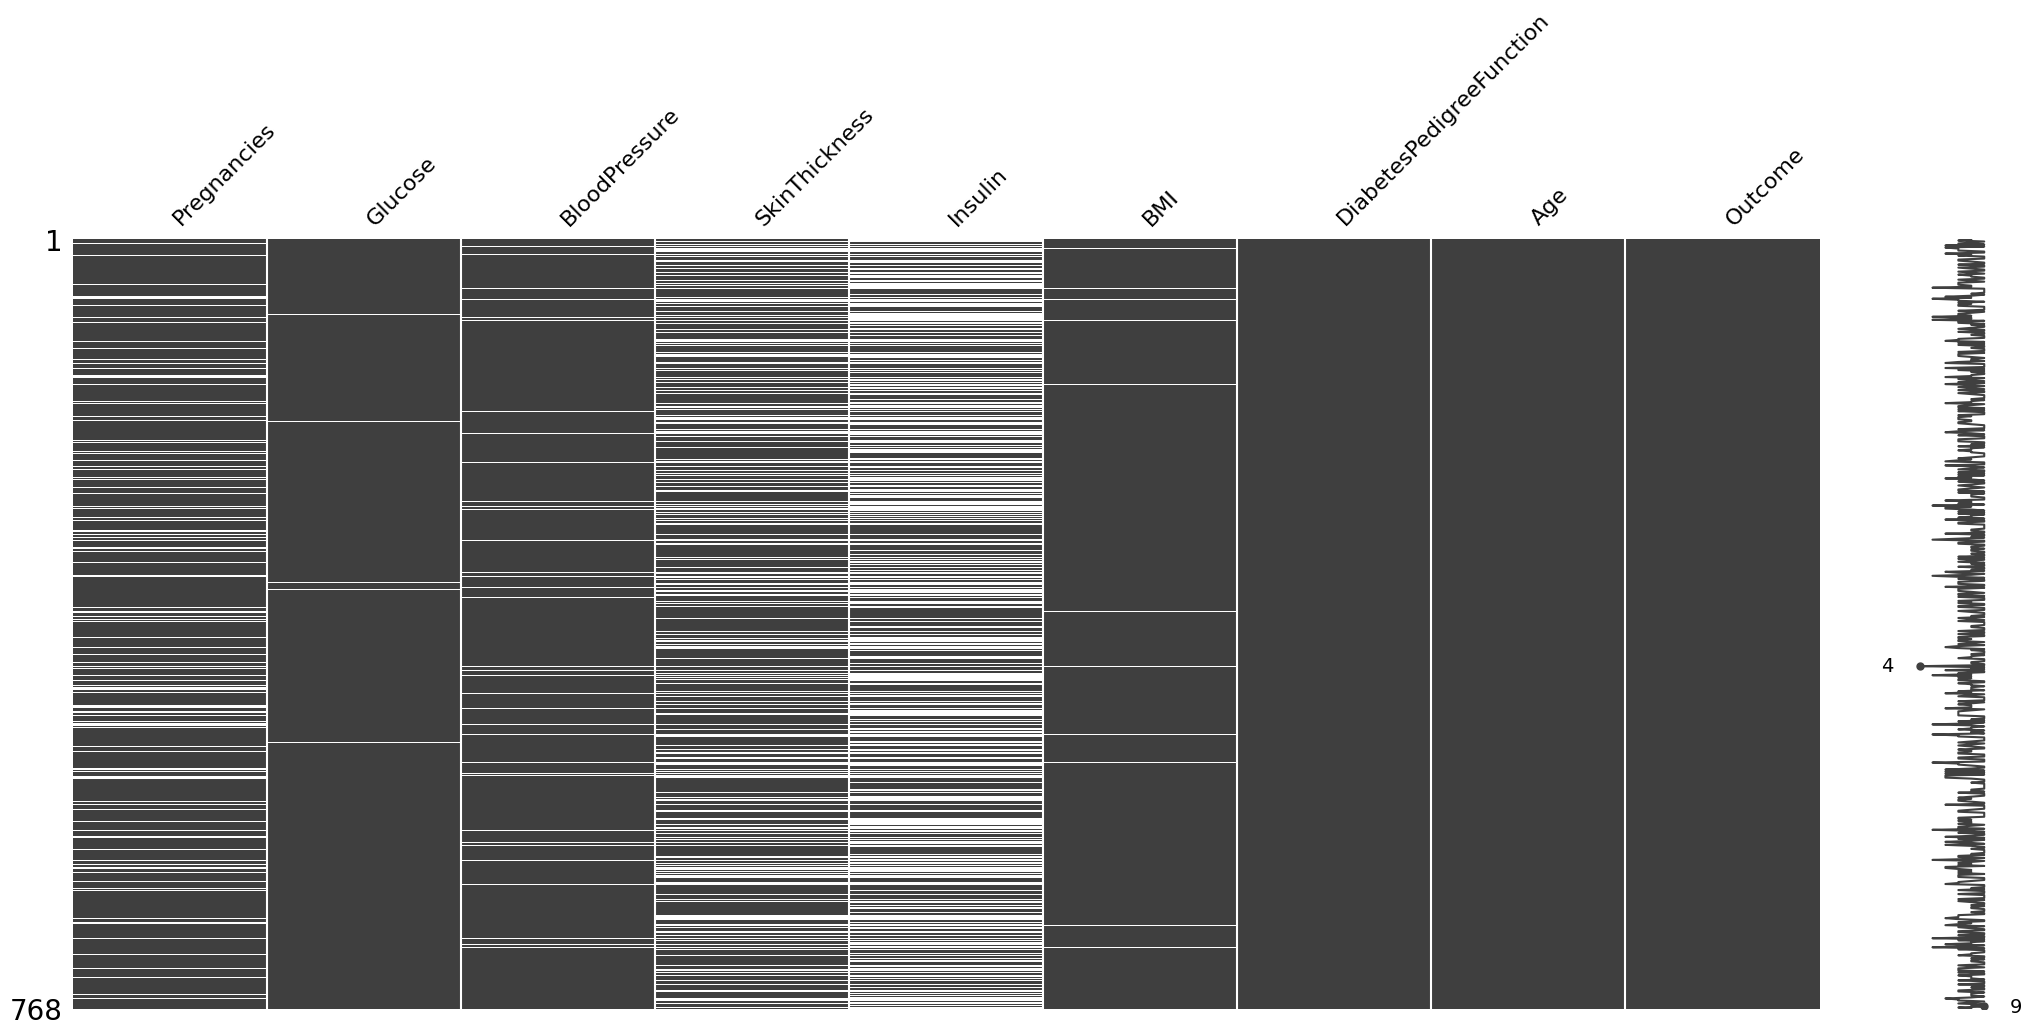

In [19]:
mno.matrix(DIAB) #(see we're located missing values)

*sklearn* library: SimpleImputer

In [20]:
SI = SimpleImputer(missing_values=np.nan, strategy='mean') #(it does it for all the columns, don't use in the project!)
DIAB_I = SI.fit_transform(DIAB)
DIAB_I = pd.DataFrame(DIAB_I, columns=DIAB.columns)


In [ ]:
SI = SimpleImputer(missing_values=np.nan, strategy='median')
DIAB_I = SI.fit_transform(DIAB)
DIAB_I = pd.DataFrame(DIAB_I, columns=DIAB.columns)


In [ ]:
SI = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
DIAB_I = SI.fit_transform(DIAB)
DIAB_I = pd.DataFrame(DIAB_I, columns=DIAB.columns)


**2. ML-BASED IMPUTATION**

*Algorithms*:
  - k-Nearest Neighbors (KNNImputer)
  - Linear/Logistic Regression
  - Other algorithms (e.g., Random Forest)

In [ ]:
DIAB.isnull().sum()

In [ ]:
list = [] #(alternative to create missing columns)
for col in DIAB.columns:
  if DIAB[col].isnull().sum() > 0:
    list.append(col)

In [23]:
missing_columns = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

IMP_DATA = pd.DataFrame(columns=["IMP" + name for name in missing_columns])


KNNImputer (*sklearn* library)

  - Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [28]:
df = DIAB.copy()

IMPUTER = KNNImputer(n_neighbors=5)

df_knn = pd.DataFrame(IMPUTER.fit_transform(df))
df_knn.columns = df.columns
for col in missing_columns:
    IMP_DATA["IMP" + col] = df_knn[col]
IMP_DATA


,IMPPregnancies,IMPGlucose,IMPBloodPressure,IMPSkinThickness,IMPInsulin,IMPBMI
0,6.0,148.0,72.0,35.0,169.0,33.6
1,1.0,85.0,66.0,29.0,58.6,26.6
2,8.0,183.0,64.0,25.8,164.6,23.3
3,1.0,89.0,66.0,23.0,94.0,28.1
4,6.2,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9
764,2.0,122.0,70.0,27.0,165.0,36.8
765,5.0,121.0,72.0,23.0,112.0,26.2
766,1.0,126.0,60.0,35.2,134.2,30.1


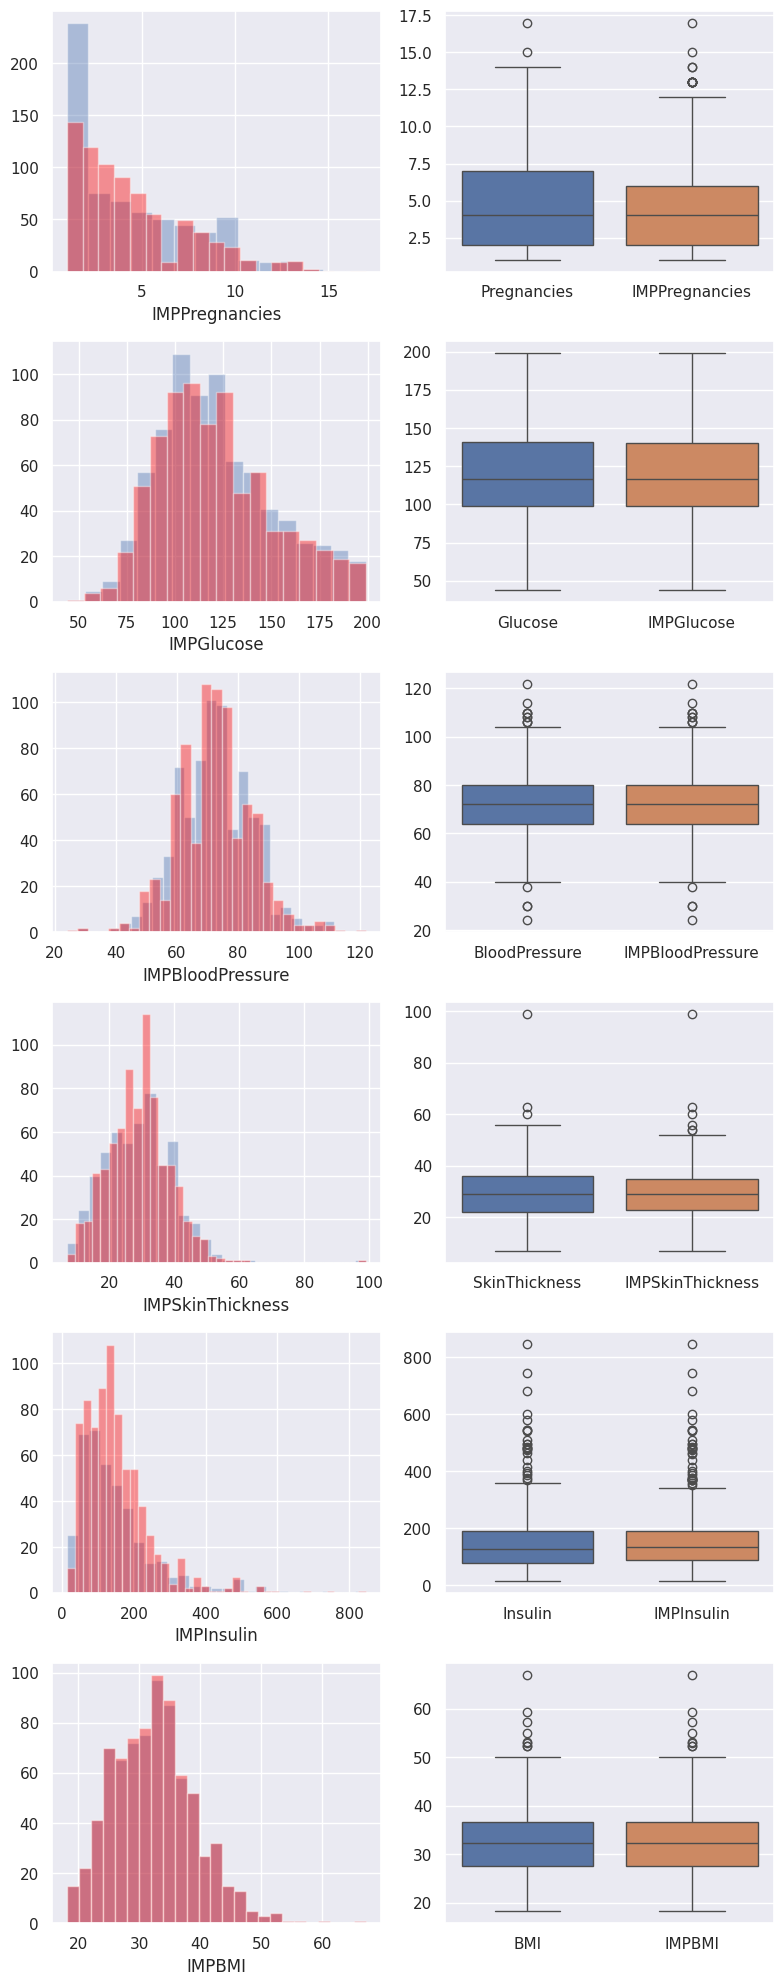

In [29]:
s.plot_imp(DIAB, IMP_DATA, missing_columns)

Linear Regression (*sklearn* library)

  - Linear Regression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares (RSS) between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [31]:
IMP_DATA = pd.DataFrame(columns = ["IMP" + name for name in missing_columns])


In [32]:
for feature in missing_columns: #(alternative to store predictions)

    DIAB[feature + '_imp'] = DIAB[feature]

    DIAB.loc[DIAB[feature].isnull(), feature + '_imp'] = DIAB[feature].median()



In [34]:
for feature in missing_columns:

    IMP_DATA["IMP" + feature] = DIAB[feature]
    parameters = list(set(DIAB.columns) - set(missing_columns) - {feature + '_imp'})
    parameters.remove('Outcome')

    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = DIAB[parameters].loc[DIAB[feature].notnull()], y = DIAB[feature + '_imp'].loc[DIAB[feature].notnull()])
    model_predicted = model.predict(DIAB[parameters].loc[DIAB[feature].isnull()])

    #observe that I preserve the index of the missing data from the original dataframe
    print("IMP" + feature + " successfully imputed")
    IMP_DATA.loc[DIAB[feature].isnull(), "IMP" + feature] = model_predicted


IMPPregnancies successfully imputed
IMPGlucose successfully imputed
IMPBloodPressure successfully imputed
IMPSkinThickness successfully imputed
IMPInsulin successfully imputed
IMPBMI successfully imputed


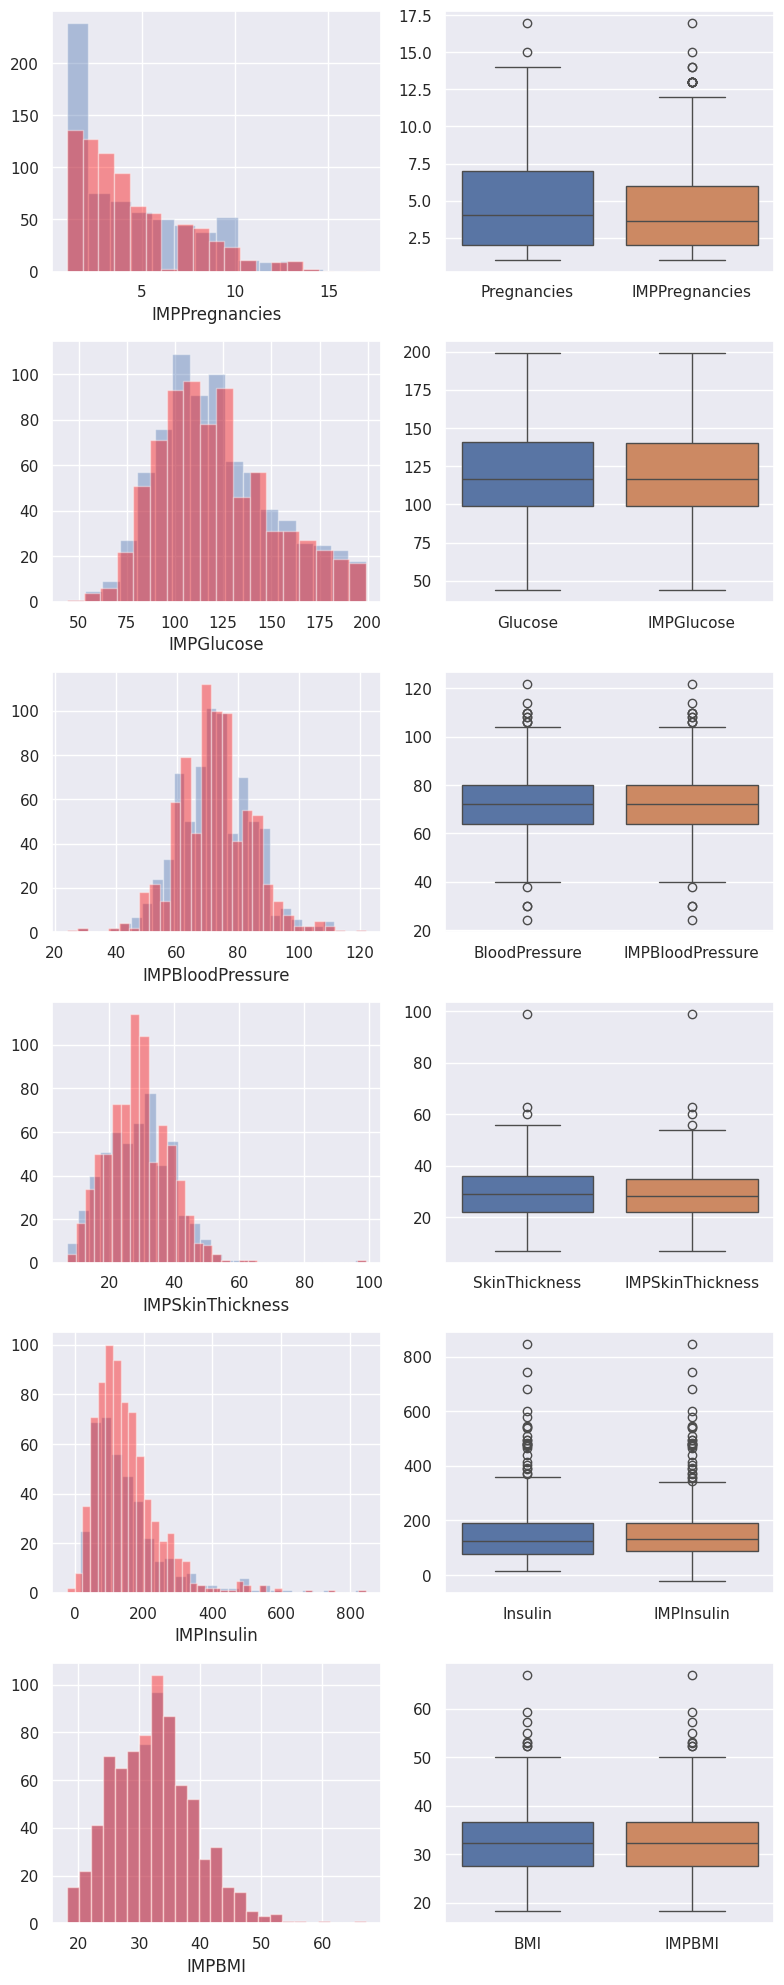

In [35]:
s.plot_imp(DIAB,IMP_DATA,missing_columns)

Other Algorithms (always of *sklearn*) with the same procedure!

(Linear/Logistic Regression for numerical/categorical variables  or Random Forest)

In [36]:
DIAB = pd.read_csv("https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/DIABETES.csv")

In [37]:
DIAB[COLS] = DIAB[COLS].replace(0,np.nan)
DIAB.loc[DIAB['Pregnancies'] > 1, 'Pregnancies'] = 'More'
DIAB.loc[DIAB['Pregnancies'] == 1, 'Pregnancies'] = 'One'

In [ ]:
DIAB

In [ ]:
missing_columns = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

IMP_DATA = pd.DataFrame(columns = ["IMP" + name for name in missing_columns])


In [38]:
#(categorical and numerical columns, different ML algorithms)
CAT = list(DIAB.select_dtypes(include=['bool','object']).columns)
NUM = list(DIAB.select_dtypes(include=['int64','float64']).columns)

for feature in missing_columns:

    DIAB[feature + '_imp'] = DIAB[feature]

    if feature in NUM:
      DIAB.loc[DIAB[feature].isnull(), feature + '_imp'] = DIAB[feature].median()
    elif feature in CAT:
      DIAB.loc[DIAB[feature].isnull(), feature + '_imp'] = DIAB[feature].mode()[0]



In [39]:
for feature in missing_columns:

    IMP_DATA["IMP" + feature] = DIAB[feature]
    parameters = list(set(DIAB.columns) - set(missing_columns) - {feature + '_imp'})

    #Create a Linear Regression model to estimate the missing data
    if feature in NUM:
      model = linear_model.LinearRegression()
    if feature in CAT:
      model = linear_model.LogisticRegression()

    X = s.encoding_categorical_variables(DIAB[parameters]) #(<-- script given for encoding)

    model.fit(X = X.loc[DIAB[feature].notnull()], y = DIAB[feature + '_imp'].loc[DIAB[feature].notnull()])
    model_predicted = model.predict(X.loc[DIAB[feature].isnull()])

    #observe that I preserve the index of the missing data from the original dataframe
    print("IMP" + feature + " successfully imputed")
    IMP_DATA.loc[DIAB[feature].isnull(), "IMP" + feature] = model_predicted


IMPPregnancies successfully imputed
IMPGlucose successfully imputed
IMPBloodPressure successfully imputed
IMPSkinThickness successfully imputed
IMPInsulin successfully imputed
IMPBMI successfully imputed


same procedure with Random Forest Classifier/Regressor:

In [ ]:
DIAB = pd.read_csv("https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/DIABETES.csv")
DIAB[COLS] = DIAB[COLS].replace(0,np.nan)
DIAB.loc[DIAB['Pregnancies'] > 1, 'Pregnancies'] = 'More'
DIAB.loc[DIAB['Pregnancies'] == 1, 'Pregnancies'] = 'One'

missing_columns = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

IMP_DATA = pd.DataFrame(columns = ["IMP" + name for name in missing_columns])

CAT = list(DIAB.select_dtypes(include=['bool','object']).columns)
NUM = list(DIAB.select_dtypes(include=['int64','float64']).columns)

for feature in missing_columns:

    DIAB[feature + '_imp'] = DIAB[feature]

    if feature in NUM:
      DIAB.loc[DIAB[feature].isnull(), feature + '_imp'] = DIAB[feature].median()
    elif feature in CAT:
      DIAB.loc[DIAB[feature].isnull(), feature + '_imp'] = DIAB[feature].mode()[0]

for feature in missing_columns:

    IMP_DATA["IMP" + feature] = DIAB[feature]
    parameters = list(set(DIAB.columns) - set(missing_columns) - {feature + '_imp'})

    #Create a Linear Regression model to estimate the missing data
    if feature in NUM:
      model = ensemble.RandomForestRegressor()
    if feature in CAT:
      model = ensemble.RandomForestClassifier()

    X = s.encoding_categorical_variables(DIAB[parameters])

    model.fit(X = X.loc[DIAB[feature].notnull()], y = DIAB[feature + '_imp'].loc[DIAB[feature].notnull()])
    model_predicted = model.predict(X.loc[DIAB[feature].isnull()])

    #observe that I preserve the index of the missing data from the original dataframe
    print("IMP" + feature + " successfully imputed")
    IMP_DATA.loc[DIAB[feature].isnull(), "IMP" + feature] = model_predicted



**3. MICE (Multiple Imputation by Chained Equations)**

*sklearn* library: IterativeImputer

  - The *MICE* procedure imputes missing data through an iterative series of predictive models. In each iteration, each specified variable in the dataset is imputed using the other variables in the dataset. These iterations should be run until it appears that convergence has been met.

In [40]:
DIAB = pd.read_csv("https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/DIABETES.csv")
DIAB[COLS] = DIAB[COLS].replace(0,np.nan)
missing_columns = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

IMP_DATA = pd.DataFrame(columns = ["IMP" + name for name in missing_columns])

df = DIAB.copy()
multivariate_impute_pipe = ColumnTransformer([
    ("impute_num", IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10),
                                    max_iter=100), df.columns)
]
)
df_mice = multivariate_impute_pipe.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns=df.columns)
for col in df_mice[df.columns]:
    if col in missing_columns:
        IMP_DATA["IMP" + col] = df_mice[col]


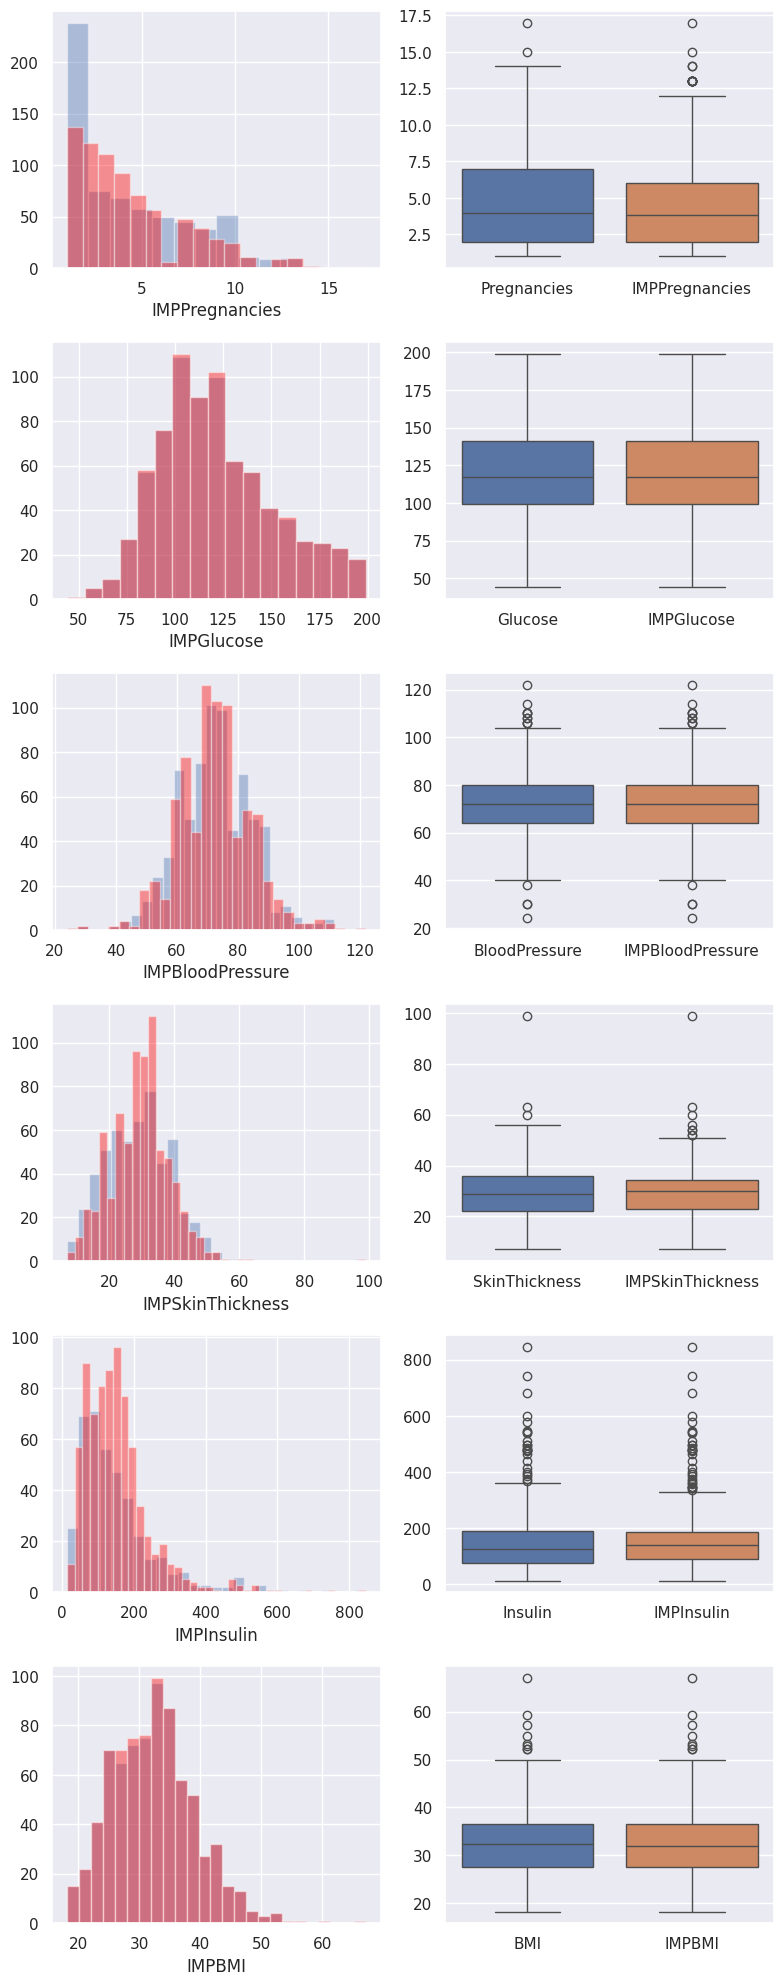

In [41]:
s.plot_imp(DIAB,IMP_DATA,missing_columns)

**Summary**

*Data Imputation:*
- DataFrame.isnull().sum()
- DataFrame.fillna()
- DataFrame.replace()

*Visualization of Missing Values:*
- mno.matrix()

*Data Imputation Algorithms (sklearn):*
- SimpleImputer()
- KNNImputer()
- IterativeImputer()